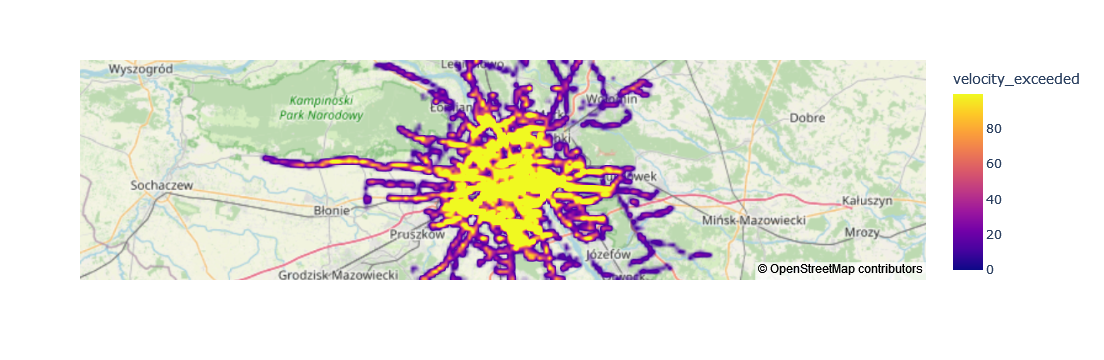

In [16]:
import pandas as pd
df = pd.read_csv('analyser\\velocity_exceeded.csv')

import plotly.express as px
fig = px.density_mapbox(df, lat='szer_geo', lon='dl_geo', z='velocity_exceeded', radius=4,
                        center=dict(lat=52.25, lon=21), zoom=8.3,
                        mapbox_style="open-street-map")
fig.show()

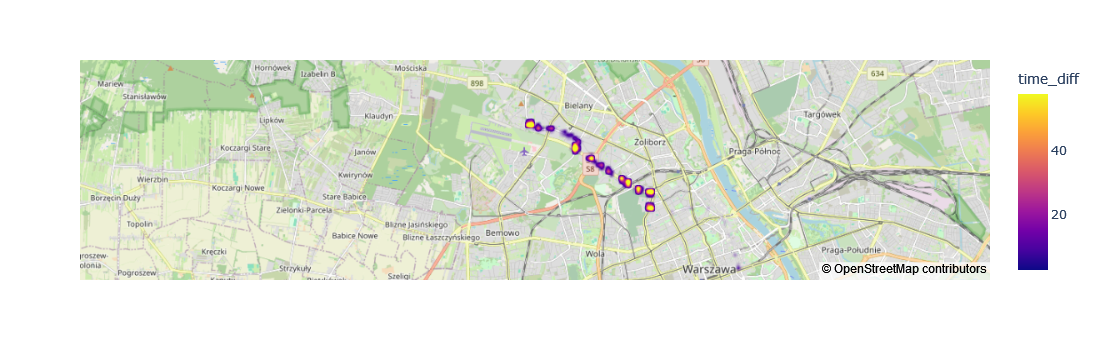

In [18]:
import pandas as pd
df = pd.read_csv('data\\buses_late_or_early180.csv')

import plotly.express as px
fig = px.density_mapbox(df, lat='szer_geo_stop', lon='dl_geo_stop', z='time_diff', radius=4,
                        center=dict(lat=52.25, lon=21), zoom=8.3,
                        mapbox_style="open-street-map")
fig.show()

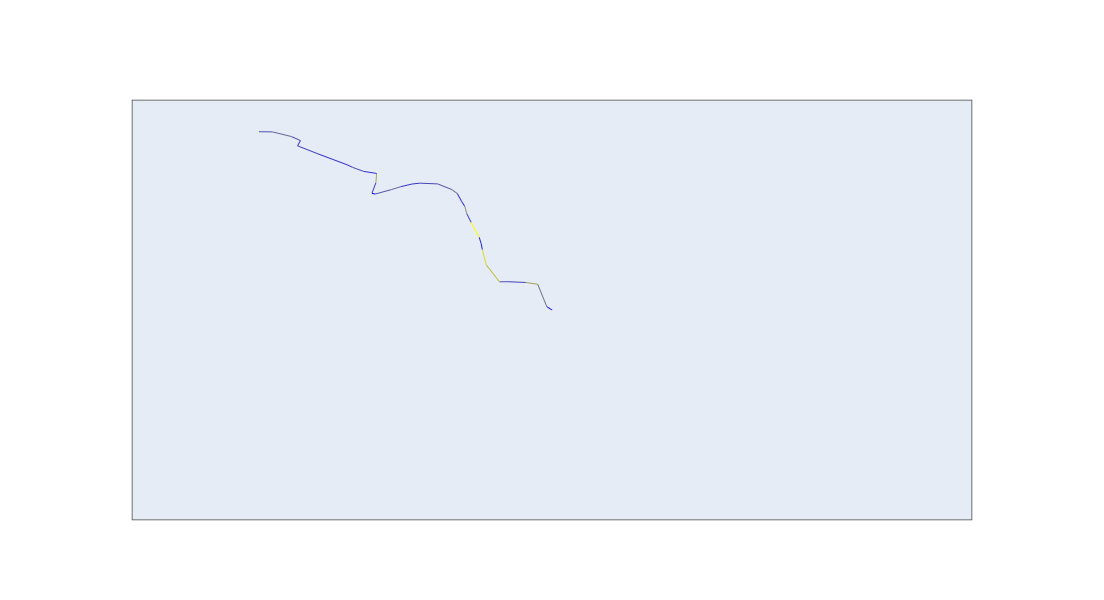

In [13]:
import plotly.graph_objects as go
import pandas as pd

fig = go.Figure()
df = pd.read_csv('data\\fit_to_schedule180TP-CHO.csv')

for i in range(len(df) - 1):
    fig.add_trace(
        go.Scattergeo(
            lon = [df['dl_geo_stop'][i], df['dl_geo_stop'][i + 1]],
            lat = [df['szer_geo_stop'][i], df['szer_geo_stop'][i + 1]],
            mode = 'lines',
            text = str(df['time_diff'][i]) + ' minut ' + df['nazwa_zespolu'][i],
            line = dict(width = 1,color = df['color'][i]
                       ),
            opacity = 1,
        )
    )

fig.update_layout(showlegend=False, width=1000, height=600)
# center the map on the first stop
fig.update_geos(center=dict(lon=df['dl_geo_stop'][0], lat=df['szer_geo_stop'][0]), projection_scale=1000)

fig.show()

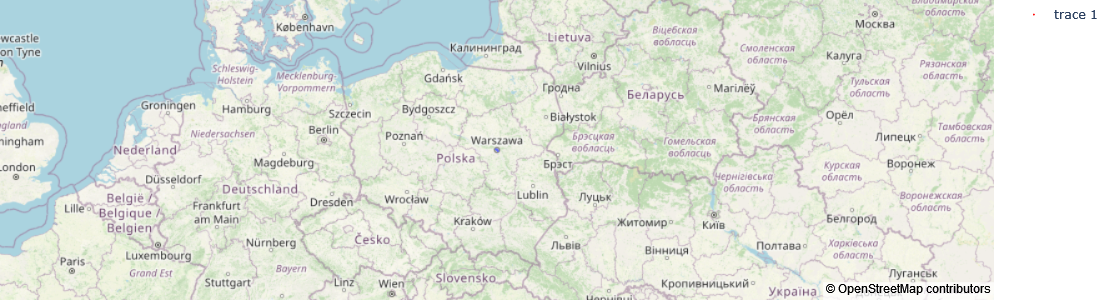

In [9]:
import pandas as pd
import plotly.graph_objects as go

us_cities = pd.read_csv("data\\fit_to_schedule180TP-CHO.csv")
import plotly.express as px

fig = px.line_mapbox(us_cities, lat="szer_geo_stop", lon="dl_geo_stop", zoom=3, height=300)

fig.add_trace(go.Scattergeo(
    lon = us_cities['dl_geo_stop'],
    lat = us_cities['szer_geo_stop'],
    mode = 'markers',
    marker = dict(
        size = 2,
        color = 'rgb(255, 0, 0)',
        line = dict(
            width = 3,
            color = 'rgba(68, 68, 68, 0)'
        )
    )))

fig.update_layout(mapbox_style="open-street-map", mapbox_zoom=4,
    margin={"r":0,"t":0,"l":0,"b":0})

fig.show()

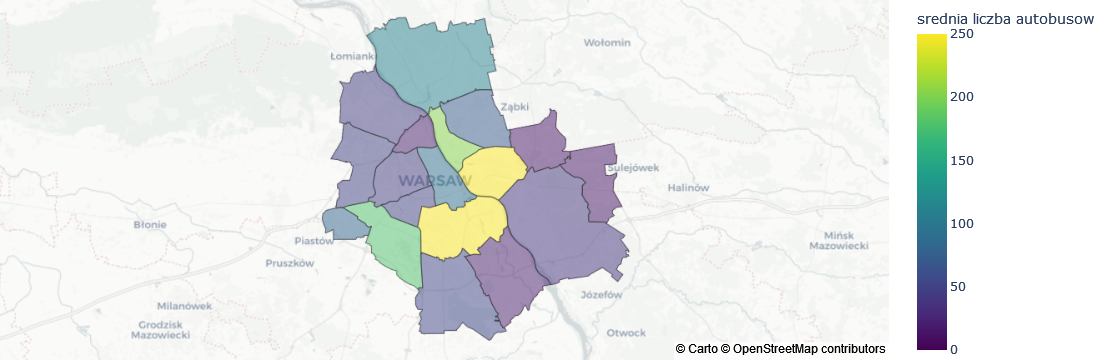

In [10]:
import json
with open('data\\warszawa-dzielnice.geojson') as f:
    districts = json.load(f)

import pandas as pd
df = pd.read_csv("data\\buses_in_districts.csv",
                   dtype={"district": str})

import plotly.express as px

fig = px.choropleth_mapbox(df, geojson=districts, locations='district', color='count',
                           featureidkey="properties.name",
                           color_continuous_scale="Viridis",
                           range_color=(0, 250),
                           mapbox_style="carto-positron",
                           zoom=8.5, center = {"lat": 52.25, "lon": 21},
                           opacity=0.5,
                           labels={'count':'srednia liczba autobusow'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()